In [620]:
import pandas as pd
data = pd.read_csv('driverAcceptanceData - driverAcceptanceData.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data

,PAY,ACCEPTED
0,29.358732,0
1,22.986847,0
2,18.020348,0
3,45.730717,1
4,14.642845,0
...,...,...
995,17.382310,0
996,20.855120,0
997,42.122166,1
998,10.853923,0


In [621]:
# Checking means
data_mean = data['PAY'].groupby(data['ACCEPTED']).mean()
df = pd.DataFrame(data_mean)
dfmean = df.T
dfmean.columns = [['Rejected', 'Accepted']]
dfmean

,Rejected,Accepted
PAY,18.624636,32.076048


**Raw Data Visualization**

<AxesSubplot: xlabel='ACCEPTED', ylabel='PAY'>

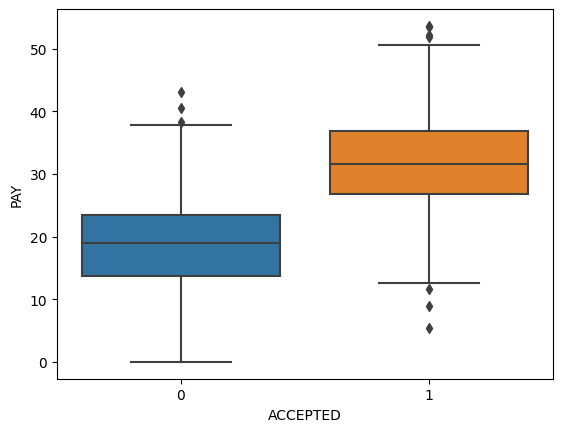

In [622]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=data['ACCEPTED'], y=data['PAY'])

In [623]:
# Getting rid of Outliers using the Interquartile method
import numpy as np
Declined = data[data['ACCEPTED']==0].reset_index(drop=True)
q75,q25 = np.percentile(Declined['PAY'], [75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
Declined[Declined["PAY"] < min] = np.nan
Declined[Declined["PAY"] > max] = np.nan

Accepted = data[data['ACCEPTED']==1].reset_index(drop=True)
q75,q25 = np.percentile(Accepted['PAY'], [75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
Accepted[Accepted["PAY"] < min] = np.nan
Accepted[Accepted["PAY"] > max] = np.nan


C:\Users\chiaw\AppData\Local\Temp\ipykernel_9760\92208927.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_clean = Accepted.append(Declined)


<AxesSubplot: xlabel='ACCEPTED', ylabel='PAY'>

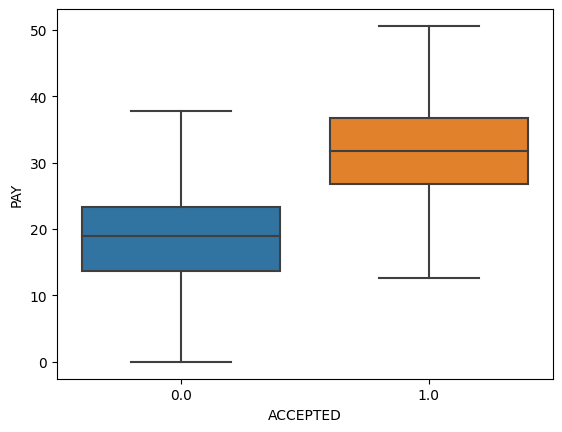

In [624]:
# Visualizaing new distributions
data_clean = Accepted.append(Declined)
sns.boxplot(x=data_clean['ACCEPTED'], y=data_clean['PAY'])

**Percentage of Ride Decline x Amount Payed**

 In order to asses the % of Driver Acceptance we must compare the proportion of
 Accepted vs Declined requests at every PAY point. Due to PAY being a continuous
 variable we will need to group them based on intervals. The smaller these intervals
 the more precise our measurements. However, given our small sample size of 1000
data points we wont be able to be very prices and will opt for an interval size of 0.5 $

In [625]:
# Distribution range
Min = int(data_clean['PAY'].min())
Max = int(round(data_clean['PAY'].max(), 0))
# Range of our distribution [0,51]

In [627]:
import numpy as np
Accepted = data_clean[data_clean['ACCEPTED']==1]
Declined = data_clean[data_clean['ACCEPTED']==0]

# Set up
Intervals = []
start = 0
for i in range(0, 51):
    Intervals.append(start)
    start = start + 1

Accepted.loc[:,'Counter'] = 1
Declined.loc[:,'Counter'] = 1


Int_Accepted = Accepted.groupby(pd.cut(Accepted['PAY'], Intervals)).sum()
Int_Declined = Declined.groupby(pd.cut(Declined['PAY'], Intervals)).sum()


C:\Users\chiaw\AppData\Local\Temp\ipykernel_9760\4123047130.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Accepted.loc[:,'Counter'] = 1
C:\Users\chiaw\AppData\Local\Temp\ipykernel_9760\4123047130.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Declined.loc[:,'Counter'] = 1


In [628]:
Clean_df = Int_Accepted.drop(['ACCEPTED', 'PAY'], axis=1).rename(columns={"Counter":"Accepted"})
Clean_df['Declined'] = Int_Declined.drop(['ACCEPTED', 'PAY'], axis=1)

Clean_df['% Declined'] = round(Clean_df['Declined'] * 100 / (Clean_df['Accepted'] + Clean_df['Declined']), 2)
Clean_df

,Accepted,Declined,% Declined
PAY,,,
"(0, 1]",0,3,100.00
"(1, 2]",0,1,100.00
"(2, 3]",0,0,NaN
"(3, 4]",0,3,100.00
"(4, 5]",0,4,100.00
"(5, 6]",0,3,100.00
"(6, 7]",0,10,100.00
"(7, 8]",0,6,100.00
"(8, 9]",0,11,100.00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, '(0, 1]'),
  Text(1, 0, '(1, 2]'),
  Text(2, 0, '(2, 3]'),
  Text(3, 0, '(3, 4]'),
  Text(4, 0, '(4, 5]'),
  Text(5, 0, '(5, 6]'),
  Text(6, 0, '(6, 7]'),
  Text(7, 0, '(7, 8]'),
  Text(8, 0, '(8, 9]'),
  Text(9, 0, '(9, 10]'),
  Text(10, 0, '(10, 11]'),
  Text(11, 0, '(11, 12]'),
  Text(12, 0, '(12, 13]'),
  Text(13, 0, '(13, 14]'),
  Text(14, 0, '(14, 15]'),
  Text(15, 0, '(15, 16]'),
  Text(16, 0, '(16, 17]'),
  Text(17, 0, '(17, 18]'),
  Text(18, 0, '(18, 19]'),
  Text(19, 0, '(19, 20]'),
  Text(20, 0, '(20, 21]'),
  Text(21, 0, '(21, 22]'),
  Text(22, 0, '(22, 23]'),
  Text(23, 0, '(23, 24]'),
  Text(24, 0, '(24, 25]'),
  Text(25, 0, '(25, 26]'),
  Text(26, 0, '(26, 27]'),
  Text(27, 0, '(27, 28]'),
  Text(28, 0, '(28, 29]'),
  Text(29, 0, '(29, 

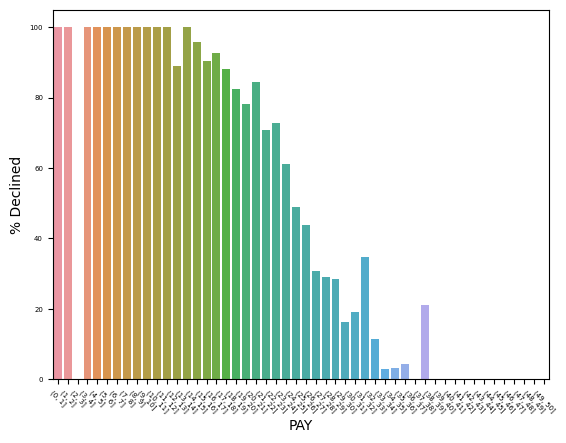

In [629]:
# Quick Visualization of likelyhood of rejection
sns.barplot(x=Clean_df.index, y=Clean_df['% Declined'])
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xticks(rotation = -45)

The data is very "bumpy" due to our low samples per interval and <br/>
the present interval range gives us a sensitivity of 1$ which is not great either.<br/>
Therefore we would benefit greatly from generateing extra points of data. <br/>
Given that our outlier-less boxplot describes a normal distribution <br/>
of both the Declined and Accepted rides we can extract the charactersitics <br/>
of their respective distributions and generate a new one with far greater <br/>
number of samples.

**Data Generation**

<AxesSubplot: ylabel='Count'>

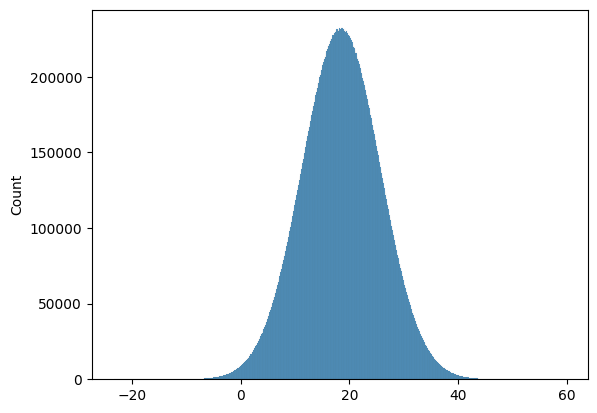

In [630]:
# Declined Data
from numpy.random import normal
mean = data_clean[data_clean['ACCEPTED']==0]['PAY'].mean()
std = data_clean[data_clean['ACCEPTED']==0]['PAY'].std()
Dec_Pay = normal(loc=mean, scale=std, size=100000000)
sns.histplot(Dec_Pay)

<AxesSubplot: ylabel='Count'>

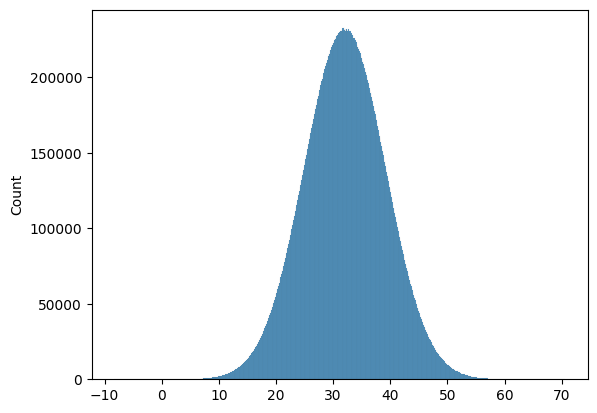

In [631]:
# Accepted Data
from numpy.random import normal
mean = data_clean[data_clean['ACCEPTED']==1]['PAY'].mean()
std = data_clean[data_clean['ACCEPTED']==1]['PAY'].std()
Ac_Pay = normal(loc=mean, scale=std, size=100000000)
sns.histplot(Ac_Pay)

In [632]:
# Getting rid of values under 0
Ac_Pay = Ac_Pay[Ac_Pay >= 0]
len(Ac_Pay)
Dec_Pay = Dec_Pay[Dec_Pay >= 0]
len(Dec_Pay)

# Ac_Pay length =  100.000.000
# Dec_Pay length =  99.477.518

99477518

In [635]:
Intervals = []
start = 0
for i in range(Min, Max*100):                          
    Intervals.append(start)
    start = start + 0.01

In [648]:
# Establishing Interval Range
Max = int(round(Ac_Pay.max(), 0))
Min = int(round(Dec_Pay.min(), 0))
# Creating intervals with 0.01 width
Intervals = []
start = 0
for i in range(Min, Max*100):                          
    Intervals.append(start)
    start = start + 0.01
Intervals = np.round(Intervals[:], 2)


Accepted = pd.DataFrame(Ac_Pay)
Declined = pd.DataFrame(Dec_Pay)

Accepted.rename(columns={0:'PAY'}, inplace=True)
Declined.rename(columns={0:'PAY'}, inplace=True)

Accepted.loc[:,'Counter'] = 1
Declined.loc[:,'Counter'] = 1

C_Accepted = Accepted.groupby(pd.cut(Accepted['PAY'], Intervals)).sum()
C_Declined = Declined.groupby(pd.cut(Declined['PAY'], Intervals)).sum()


<AxesSubplot: xlabel='PAY', ylabel='% Declined'>

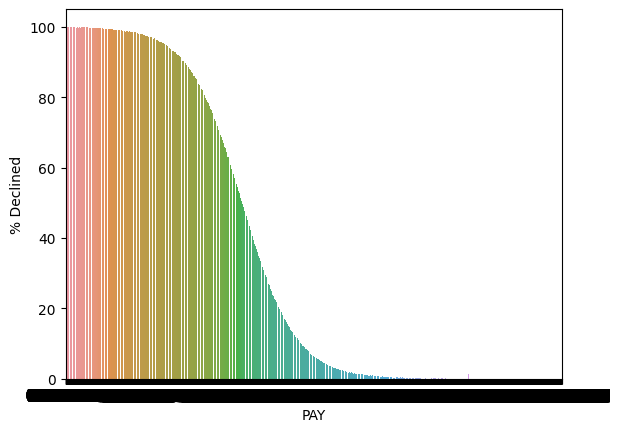

In [649]:
Percent_df = C_Accepted.drop('PAY', axis=1).rename(columns={"Counter":"Accepted"})
Percent_df['Declined'] = C_Declined['Counter']


Percent_df['% Declined'] = round(Percent_df['Declined'] * 100 / (Percent_df['Accepted'] + Percent_df['Declined']), 2)

Percent_df = Percent_df.dropna()

sns.barplot(Percent_df, x=Percent_df.index, y=Percent_df['% Declined'])

# Our result is an inverse sigmoid function as shown below

In [650]:
Percent_df.head(10)

,Accepted,Declined,% Declined
PAY,,,
"(0.0, 0.01]",1,2112,99.95
"(0.01, 0.02]",6,2162,99.72
"(0.02, 0.03]",1,2141,99.95
"(0.03, 0.04]",4,2079,99.81
"(0.04, 0.05]",2,2067,99.90
"(0.05, 0.06]",2,2116,99.91
"(0.06, 0.07]",2,2148,99.91
"(0.07, 0.08]",3,2082,99.86
"(0.08, 0.09]",3,2208,99.86


In [651]:
Percent_df.loc[0.05]['% Declined']

99.9

**Rejection function**

In [652]:
def Rejection_Rate(x):
    Percent = Percent_df.loc[x]['% Declined']/100
    return Percent

In [653]:
def Acceptance_Rate(x):
    Percent = 1 - Percent_df.loc[x]['% Declined']/100
    return Percent

In [654]:
100 * Rejection_Rate(30)

22.52

In [655]:
import numpy as np
from scipy.stats import poisson
import itertools

# Initial Parameter
x = 20                                                                               # Example of amount payed to drivers
lamb = [1]                                                                           # Initial lambda value for our poisson distributions
Ri_Retention = [1000]                                                                # Initial number of riders for first month
Max_Riders = 10000                                                                   # Max. number of possible customers

Exhausted_Riders = 0                                                                 # Exhausted Rider counter set at 0
Profit = []                                                                          # Profit per itteration (month)

# Poisson Distribution of every previous Lambda
for month in range(0, 12):

# Halting if Riders are exhausted
    if Max_Riders <= Exhausted_Riders:
        break

    Total_LambDist = []                                                                  # List of lists containing all the distributions of each given lambda
    for ele in range(0, len(lamb)):
        Total_LambDist.append(poisson.rvs(mu=lamb[ele], size=int(round(Ri_Retention[ele],0))))

    Total_LambDist = [item for sublist in Total_LambDist for item in sublist]            # Our complete new distribution
    Unique_Values = list(set(Total_LambDist))                                            # Unique Number of Requests (0 Requests, 1 Request, 2 Requests...) 

# Number of Riders per Number of Requests
    NRi_NRe = []                                                                         # Initializing list which will contain the amount of riders per number of requests
    for i in range(0, len(Unique_Values)):                                               # Declaring for loop to iterate over every element of our Unique Values
        NRi_NRe.append(np.count_nonzero(Total_LambDist == Unique_Values[i]))             # Appending total amount of every unique number of requests

# Attrition Rate per Number of RidersxNumber of Requests
    Attrition = []                                                       # Initializing a second list which will contain NRi_NRe(ele)*Rejection_Rate^Number of request
    for ele in NRi_NRe:                                                  # Declaring for loop to iterate over every element of total amount of unique requests
        Attrition.append(ele*Rejection_Rate(x)**NRi_NRe.index(ele))      # Appending attrition rate defined as total amount of unique requests * rejection rate^number of requests performed

# Calculating benefit
    Earning = 30 * sum(Total_LambDist)*Acceptance_Rate(x)                # Total earnings per itteration
    Cost = x * sum(Total_LambDist)*Acceptance_Rate(x)                    # Total cost per itteration
    Benefit = Earning - Cost                                             # Total benefits per itteration
    Profit.append(Benefit)

# Setting up variables for next loop
    Ri_Retention = np.subtract(NRi_NRe, Attrition)[1:]                   # New Ri_Retention values
    Ri_Retention[0] = Ri_Retention[0] + 1000                             # New Riders Addad
    lamb = Unique_Values[1:]                                             # New lambda values
    Exhausted_Riders = Exhausted_Riders + sum(Attrition)                 # New Exhausted Riders
Profit




[2055.125,
 2622.540000000001,
 2913.2649999999994,
 3037.575,
 3226.045,
 3410.505000000001,
 3504.7400000000007,
 3611.005000000001,
 3865.6399999999994,
 4012.005000000001,
 4028.045]

In [656]:
# Creating a function based on the previously described loop
def profit(x):

    import numpy as np
    from scipy.stats import poisson
    import itertools

    # Initial Parameters
    lamb = [1]                                                                           # Initial lambda value for our poisson distributions
    Ri_Retention = [1000]                                                                # Initial number of riders for first month
    Max_Riders = 10000                                                                   # Max. number of possible customers

    Exhausted_Riders = 0                                                                 # Exhausted Rider counter set at 0
    Profit = []                                                                          # Profit per itteration (month)

    # Poisson Distribution of every previous Lambda
    for month in range(0, 12):

    # Halting if Riders are exhausted
        if Max_Riders <= Exhausted_Riders:
            break

        Total_LambDist = []                                                                  # List of lists containing all the distributions of each given lambda
        for ele in range(0, len(lamb)):
            Total_LambDist.append(poisson.rvs(mu=lamb[ele], size=int(round(Ri_Retention[ele],0))))

        Total_LambDist = [item for sublist in Total_LambDist for item in sublist]            # Our complete new distribution
        Unique_Values = list(set(Total_LambDist))                                            # Unique Number of Requests (0 Requests, 1 Request, 2 Requests...) 

    # Number of Riders per Number of Requests
        NRi_NRe = []                                                                         # Initializing list which will contain the amount of riders per number of requests
        for i in range(0, len(Unique_Values)):                                               # Declaring for loop to iterate over every element of our Unique Values
            NRi_NRe.append(np.count_nonzero(Total_LambDist == Unique_Values[i]))             # Appending total amount of every unique number of requests

    # Attrition Rate per Number of RidersxNumber of Requests
        Attrition = []                                                       # Initializing a second list which will contain NRi_NRe(ele)*Rejection_Rate^Number of request
        for ele in NRi_NRe:                                                  # Declaring for loop to iterate over every element of total amount of unique requests
            Attrition.append(ele*Rejection_Rate(x)**NRi_NRe.index(ele))      # Appending attrition rate defined as total amount of unique requests * rejection rate^number of requests performed

    # Calculating benefit
        Earning = 30 * sum(Total_LambDist)*Acceptance_Rate(x)                # Total earnings per itteration
        Cost = x * sum(Total_LambDist)*Acceptance_Rate(x)                    # Total cost per itteration
        Benefit = Earning - Cost                                             # Total benefits per itteration
        Profit.append(Benefit)

    # Setting up variables for next loop
        Ri_Retention = np.subtract(NRi_NRe, Attrition)[1:]                   # New Ri_Retention values
        Ri_Retention[0] = Ri_Retention[0] + 1000                             # New Riders Addad
        lamb = Unique_Values[1:]                                             # New lambda values
        Exhausted_Riders = Exhausted_Riders + sum(Attrition)                 # New Exhausted Riders
    return sum(Profit)




In [670]:
from tqdm import tqdm
# Itterating our function over every price interval
List_Profit = []


# We can limit the itterations from 0 up until 30 since its the break-even point
for i in tqdm(Intervals[np.where(Intervals == 0.01)[0][0]:np.where(Intervals == 30.01)[0][0]]):
    List_Profit.append(profit(i))




100%|██████████| 3000/3000 [02:27<00:00, 20.39it/s]


(array([   0,  150,  300,  450,  600,  750,  900, 1050, 1200, 1350, 1500,
        1650, 1800, 1950, 2100, 2250, 2400, 2550, 2700, 2850]),
 [Text(0, 0, '0.01'),
  Text(150, 0, '1.51'),
  Text(300, 0, '3.01'),
  Text(450, 0, '4.51'),
  Text(600, 0, '6.01'),
  Text(750, 0, '7.51'),
  Text(900, 0, '9.01'),
  Text(1050, 0, '10.51'),
  Text(1200, 0, '12.01'),
  Text(1350, 0, '13.51'),
  Text(1500, 0, '15.01'),
  Text(1650, 0, '16.51'),
  Text(1800, 0, '18.01'),
  Text(1950, 0, '19.51'),
  Text(2100, 0, '21.01'),
  Text(2250, 0, '22.51'),
  Text(2400, 0, '24.01'),
  Text(2550, 0, '25.51'),
  Text(2700, 0, '27.01'),
  Text(2850, 0, '28.51')])

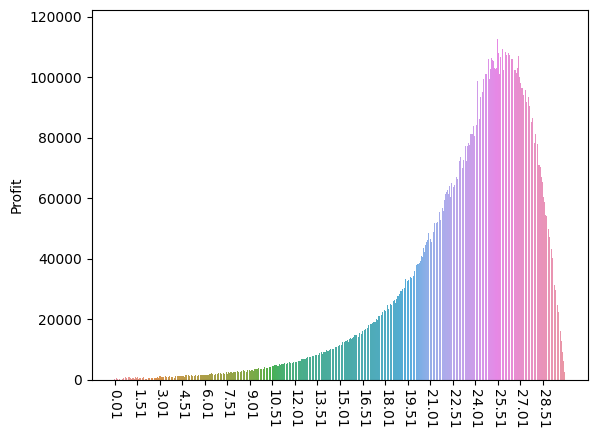

In [671]:
Profit_df = pd.DataFrame(List_Profit)
Profit_df = Profit_df.set_index([Intervals[1:3001]])
Profit_df.columns = ['Profit']
Profit_df
sns.barplot(Profit_df, x=Profit_df.index, y=Profit_df['Profit'])

plt.locator_params(axis='x', nbins=20)
plt.xticks(rotation = -90)

Once we have taken a glance at the profit data we can futher itterate over the <br/>
narrower interval band in order to generate a greater sample of our interested <br/>
intervals and smooth the data through univariate means (mean|median) <br/>


In [672]:
# Selecting only the interval [24.01, 28.51] and itterating 1000 times
from tqdm import tqdm
# Itterating our function over every price interval
List_Profit_Interval = []


# We can limit the itterations from 0 up until 30 since its the break-even point
for i in tqdm(Intervals[np.where(Intervals == 24.01)[0][0]:np.where(Intervals == 28.51)[0][0]]):
    List_Profit_Interval.append(profit(i))


100%|██████████| 450/450 [00:38<00:00, 11.80it/s]


AttributeError: 'DataFrame' object has no attribute 'bin'

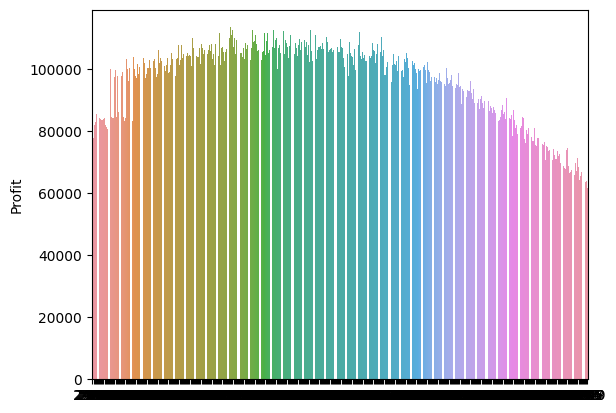

In [720]:
Profit_df_Interval = pd.DataFrame(List_Profit_Interval)
Profit_df_Interval = Profit_df_Interval.set_index([Intervals[np.where(Intervals == 24.01)[0][0]:np.where(Intervals == 28.51)[0][0]]]) 
Profit_df_Interval.columns = ['Profit']
Profit_df_Interval

#bins=np.arange(Profit_df_Interval.bin(), Profit_df_Interval.max()+1)

sns.barplot(x=Profit_df_Interval.index, y=Profit_df_Interval['Profit'])  # quizas es algo con la libreria de Seaborn (SnS) porque se da este mismo error
# en todas las graficas pensaba que era tan solo para que se viese mejor el gradiante de color, pero en la grafica de abajo no tiene sentido ninguno
bins=np.arange(Profit_df_Interval.bin(), Profit_df_Interval.max()+1)
# Dale al over, lo voy mirando mientras que jugais
# La cosa es que no hay ningun valor NaN ni Null


plt.locator_params(axis='x', nbins=20) # Est
plt.xticks(rotation = -90)

In [ ]:
# no no esta mejor, creo que es eso tiene que ser cosa de los bins
# Ahora esta representado todo solo que las separaciones se debera a los bins
# Antes quie

In [715]:
Profit_df_Interval.set_index([Intervals[np.where(Intervals == 24.01)[0][0]:np.where(Intervals == 28.51)[0][0]]]) 

,Profit
24.01,87243.505410
24.02,77809.428996
24.03,81866.434482
24.04,82986.436848
24.05,85332.359350
...,...
28.46,64559.785752
28.47,64438.050690
28.48,63642.953584
28.49,63864.320520


In [712]:
Profit_df_Interval['Profit'][24.7] # aqui puedes ver que hay datos, pese a que no estan representados

98670.39468

In [706]:
Profit_df_Interval['Profit'][25]

KeyError: 'Profit'